<a href="https://colab.research.google.com/github/muhaseeb34/Data3001-Modelling-2/blob/main/Info_Gain_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving new_data.csv to new_data.csv


In [9]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv("final_data_product.csv")
df

,lap_id,invalid_lap,BPS_SPEED,BPS_THROTTLE,BPS_STEER,BPS_BRAKE,BPS_CURRENTLAPTIMEINMS,BPS_LAPDISTANCE,BPS_WORLDPOSITIONX,BPS_WORLDPOSITIONY,...,dist_530_YAW,dist_530_PITCH,dist_530_ROLL,dist_530_left_dist,dist_530_right_dist,dist_530_dist_apex_1,dist_530_dist_apex_2,dist_530_angle_to_apex1,dist_530_angle_to_apex2,dist_530_proj_from_ref
0,10021698834789871149_1,1,316.0,1.000000,0.074568,0.0,2615.0,223.0,274.071987,313.458779,...,-2.715189,0.000475,-0.016953,1.741342,10.851370,132.666175,33.599712,-177.333510,-157.363838,3.100772
1,10021698834789871149_10,1,324.0,0.970802,0.000464,0.0,3097.0,273.0,310.096901,278.846172,...,-2.677639,-0.002429,-0.010994,5.229576,7.362893,134.315712,34.235318,-178.276773,-162.785343,0.365266
2,10021698834789871149_11,1,322.0,1.000000,-0.002375,0.0,2976.0,258.0,298.743940,288.688005,...,-2.672484,-0.003209,-0.015086,4.491344,8.101110,133.962370,34.073817,-177.906287,-161.483133,0.368740
3,10021698834789871149_12,0,322.0,0.025177,0.006011,0.0,3049.0,269.0,307.165908,281.569461,...,-2.683784,-0.003549,-0.013458,4.000375,8.592165,133.726732,33.972230,-177.665140,-160.617290,0.856654
4,10021698834789871149_13,1,324.0,1.000000,0.021114,0.0,3046.0,268.0,306.397540,282.215448,...,-2.576070,0.002121,-0.016932,5.969796,6.622633,134.674490,34.413890,-179.086529,-164.518584,1.101108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,9874269645241895165_2,1,144.0,0.000000,-0.525250,0.0,6234.0,450.0,369.369267,134.915112,...,-2.670881,0.003020,-0.000062,0.781471,11.886334,128.781581,29.677781,-178.004607,-156.571125,3.664728
1028,9941972541231747669_1,1,324.0,1.000000,0.000000,0.0,2979.0,263.0,302.615240,285.497492,...,-2.689289,-0.003212,-0.016119,2.482649,10.109993,133.011217,33.706067,-177.128822,-158.125436,2.364715
1029,9941972541231747669_2,0,324.0,1.000000,-0.000000,0.0,3014.0,264.0,303.184481,284.646456,...,-2.691542,-0.003572,-0.011709,3.187732,9.404851,133.342247,33.821835,-177.350536,-159.259773,1.664493
1030,9948558370850722411_1,1,324.0,1.000000,-0.003344,0.0,3149.0,276.0,301.987594,286.287858,...,-2.532977,0.004081,-0.015205,1.779133,10.876460,130.089505,30.731174,-178.246422,-158.331977,2.772034


In [10]:
DROPPED = [
    "dist_360_SPEED", "dist_360_THROTTLE", "dist_360_STEER", "dist_360_BRAKE",
    "dist_360_CURRENTLAPTIMEINMS", "dist_360_LAPDISTANCE", "dist_360_WORLDPOSITIONX", "dist_360_WORLDPOSITIONY",
    "dist_360_WORLDFORWARDDIRX", "dist_360_WORLDFORWARDDIRY", "dist_360_YAW", "dist_360_PITCH",
    "dist_360_ROLL", "dist_360_left_dist", "dist_360_right_dist", "dist_360_dist_apex_1",
    "dist_360_dist_apex_2", "dist_360_angle_to_apex1", "dist_360_angle_to_apex2", "dist_360_proj_from_ref",
    "dist_430_SPEED", "dist_430_THROTTLE", "dist_430_STEER", "dist_430_BRAKE",
    "dist_430_CURRENTLAPTIMEINMS", "dist_430_LAPDISTANCE", "dist_430_WORLDPOSITIONX", "dist_430_WORLDPOSITIONY",
    "dist_430_WORLDFORWARDDIRX", "dist_430_WORLDFORWARDDIRY", "dist_430_YAW", "dist_430_PITCH",
    "dist_430_ROLL", "dist_430_left_dist", "dist_430_right_dist", "dist_430_dist_apex_1",
    "dist_430_dist_apex_2", "dist_430_angle_to_apex1", "dist_430_angle_to_apex2", "dist_430_proj_from_ref",
    "dist_530_SPEED", "dist_530_THROTTLE", "dist_530_STEER", "dist_530_BRAKE",
    "dist_530_CURRENTLAPTIMEINMS", "dist_530_LAPDISTANCE", "dist_530_WORLDPOSITIONX", "dist_530_WORLDPOSITIONY",
    "dist_530_WORLDFORWARDDIRX", "dist_530_WORLDFORWARDDIRY", "dist_530_YAW", "dist_530_PITCH",
    "dist_530_ROLL", "dist_530_left_dist", "dist_530_right_dist", "dist_530_dist_apex_1",
    "dist_530_dist_apex_2", "dist_530_angle_to_apex1", "dist_530_angle_to_apex2", "dist_530_proj_from_ref",
    "BPS_right_dist", "BPE_right_dist", "THS_right_dist", "THE_right_dist", "STS_right_dist",
    "STM_right_dist", "STE_right_dist", "APX1_right_dist", "APX2_right_dist", "BPS_CURRENTLAPTIMEINMS",
    "BPE_CURRENTLAPTIMEINMS", "THS_CURRENTLAPTIMEINMS", "THE_CURRENTLAPTIMEINMS", "STS_CURRENTLAPTIMEINMS",
    "STM_CURRENTLAPTIMEINMS", "STE_CURRENTLAPTIMEINMS", "APX1_CURRENTLAPTIMEINMS", "APX2_CURRENTLAPTIMEINMS"
]

data = df.drop(columns=DROPPED).dropna().drop_duplicates()
data = data[data['Target_CURRENTLAPTIMEINMS'] < 60000]
X = data.drop(columns=["lap_id","invalid_lap", "Target_CURRENTLAPTIMEINMS"])
y = data["Target_CURRENTLAPTIMEINMS"]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
m_info = mutual_info_regression(X_scaled, y)
Scores = pd.DataFrame(sorted(zip(X.columns, m_info), key=lambda x: x[1], reverse=True), columns=["feature", "mi_score"])
pd.set_option('display.max_rows', 200)
Scores


,feature,mi_score
0,APX2_SPEED,0.830743
1,STE_SPEED,0.654403
2,STM_SPEED,0.629347
3,THE_SPEED,0.417126
4,BPS_SPEED,0.344717
5,THS_SPEED,0.342425
6,APX1_SPEED,0.328189
7,APX1_YAW,0.262497
8,STE_THROTTLE,0.249163
9,APX2_PITCH,0.247753


In [12]:
# LASSO feature selection
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

TARGET = "Target_CURRENTLAPTIMEINMS"
features = [c for c in data.columns if c not in {"lap_id", TARGET}]

# Standarise
mu = data[features].mean()
sigma = data[features].std()
data_std = data.copy()
data_std[features] = (data[features] - mu) / sigma

# Choose alpha
lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(data_std[features],data_std[TARGET])
print(f'LASSO Lambda: {lasso_cv.alpha_}')

# Run LASSO
Lasso_reg = Lasso(alpha = 91)
Lasso_reg.fit(data_std[features], data_std[TARGET])

# Print features with non-zero coef
coefs = pd.Series(Lasso_reg.coef_, index=features)
nonzero = coefs[coefs != 0]
print("\nNon-zero LASSO coefficients:")
print(pd.DataFrame({"feature": nonzero.index, "coef": nonzero.values}).to_string(index=True))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151562.0789005756, tolerance: 1098736.8385543942
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1610938.5656137466, tolerance: 1208915.0829181818
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1396333.1258921623, tolerance: 1208915.0829181818
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converge

LASSO Lambda: 91.04784573551602

Non-zero LASSO coefficients:
                  feature         coef
0               BPS_SPEED  -430.634840
1               BPS_STEER  -122.226794
2                 BPE_YAW    31.965356
3                BPE_ROLL   121.417148
4         BPE_dist_apex_1   131.454793
5      BPE_angle_to_apex1     2.484644
6       BPE_proj_from_ref    30.757547
7    THS_WORLDFORWARDDIRX    49.843661
8                 THS_YAW    91.963645
9                THS_ROLL   278.419460
10    THS_ext_LAPDISTANCE   -45.341286
11     THS_ext_TIMETOINMS   436.301640
12              THE_SPEED  -765.067019
13              THE_BRAKE     7.581066
14        THE_dist_apex_1   258.533733
15    THE_ext_LAPDISTANCE  -904.876500
16     THE_ext_TIMETOINMS  1220.794680
17           STS_THROTTLE   213.272147
18              STS_STEER  -190.018219
19                STS_YAW   570.696062
20     STS_angle_to_apex1  -418.516561
21     STS_angle_to_apex2  -357.763996
22     STS_ext_TIMETOINMS   239.641188
23

In [13]:
# Elastic Net
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import KFold, cross_val_score

TARGET = "Target_CURRENTLAPTIMEINMS"
features = [c for c in data.columns if c not in {"lap_id", TARGET}]

X = data[features].copy()
y = data[TARGET].copy()

pre = ColumnTransformer(
    [("num", make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), features)],
    remainder="drop"
)

enetcv = ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    alphas=None,
    cv=5,
    max_iter=200000,
    tol=1e-3,
    n_jobs=-1,
    random_state=42
)

pipe = make_pipeline(pre, enetcv)

# Fit
pipe.fit(X, y)

best_alpha   = pipe.named_steps["elasticnetcv"].alpha_
best_l1ratio = pipe.named_steps["elasticnetcv"].l1_ratio_
print(f"Best alpha: {best_alpha:.6f} | Best l1_ratio: {best_l1ratio:.3f}")

coef_vec = pipe.named_steps["elasticnetcv"].coef_
coefs = pd.Series(coef_vec, index=features)

tol = 1e-8
nonzero = coefs[~np.isclose(coefs.values, 0.0, atol=tol)]
print(f"\nNon-zero Elastic Net coefficients (|coef| > {tol}): {len(nonzero)}")
print(nonzero.to_frame("coef").to_string())

cv = KFold(n_splits=5, shuffle=True, random_state=42)
enet_final = ElasticNet(alpha=best_alpha, l1_ratio=best_l1ratio,
                        max_iter=200000, tol=1e-3, random_state=42)
pipe_final = make_pipeline(pre, enet_final)

neg_mse = cross_val_score(pipe_final, X, y,
                          scoring="neg_mean_squared_error",
                          cv=cv, n_jobs=-1)
rmse = np.sqrt(-neg_mse)
print("\n5-fold CV RMSE:")
print("Fold RMSEs:", np.round(rmse, 3))
print("Mean RMSE :", np.round(rmse.mean(), 3))
print("Std  RMSE :", np.round(rmse.std(), 3))

Best alpha: 84.963034 | Best l1_ratio: 1.000

Non-zero Elastic Net coefficients (|coef| > 1e-08): 47
                              coef
BPS_SPEED              -426.987362
BPS_STEER              -132.289973
BPS_ext_TIMETOINMS       -9.723860
BPE_YAW                  35.113500
BPE_ROLL                128.064126
BPE_dist_apex_1         136.604056
BPE_angle_to_apex1        7.740298
BPE_proj_from_ref        42.143336
THS_WORLDFORWARDDIRX     64.107855
THS_YAW                  91.221781
THS_ROLL                281.590742
THS_ext_LAPDISTANCE     -70.276166
THS_ext_TIMETOINMS      453.608428
THE_SPEED              -782.332825
THE_BRAKE                15.861652
THE_dist_apex_1         249.065634
THE_ext_LAPDISTANCE    -922.981299
THE_ext_TIMETOINMS     1239.005678
STS_THROTTLE            212.008381
STS_STEER              -192.216186
STS_YAW                 580.339044
STS_left_dist            -2.084104
STS_angle_to_apex1     -421.917471
STS_angle_to_apex2     -365.727529
STS_ext_TIMETOINMS      

In [14]:
#Random Forrest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

=== TOP FEATURES BY INFORMATION GAIN ===
Total features analyzed: 174

Top 30 Most Important Features:
                  feature  mi_score
0              APX2_SPEED  0.830743
1               STE_SPEED  0.654403
2               STM_SPEED  0.629347
3               THE_SPEED  0.417126
4               BPS_SPEED  0.344717
5               THS_SPEED  0.342425
6              APX1_SPEED  0.328189
7                APX1_YAW  0.262497
8            STE_THROTTLE  0.249163
9              APX2_PITCH  0.247753
10  APX2_WORLDFORWARDDIRY  0.242737
11  APX1_WORLDFORWARDDIRX  0.229637
12     THE_ext_TIMETOINMS  0.223403
13              BPE_SPEED  0.208662
14    STS_ext_LAPDISTANCE  0.190101
15                STM_YAW  0.187820
16     STE_angle_to_apex2  0.187065
17          APX2_THROTTLE  0.179506
18        STE_LAPDISTANCE  0.177360
19              STS_SPEED  0.177039
20    THE_ext_LAPDISTANCE  0.176938
21   STE_WORLDFORWARDDIRX  0.176648
22     STM_WORLDPOSITIONY  0.175534
23           STM_THROTTLE  0.1755

/tmp/ipython-input-165297984.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, y='feature', x='mi_score', palette='viridis')


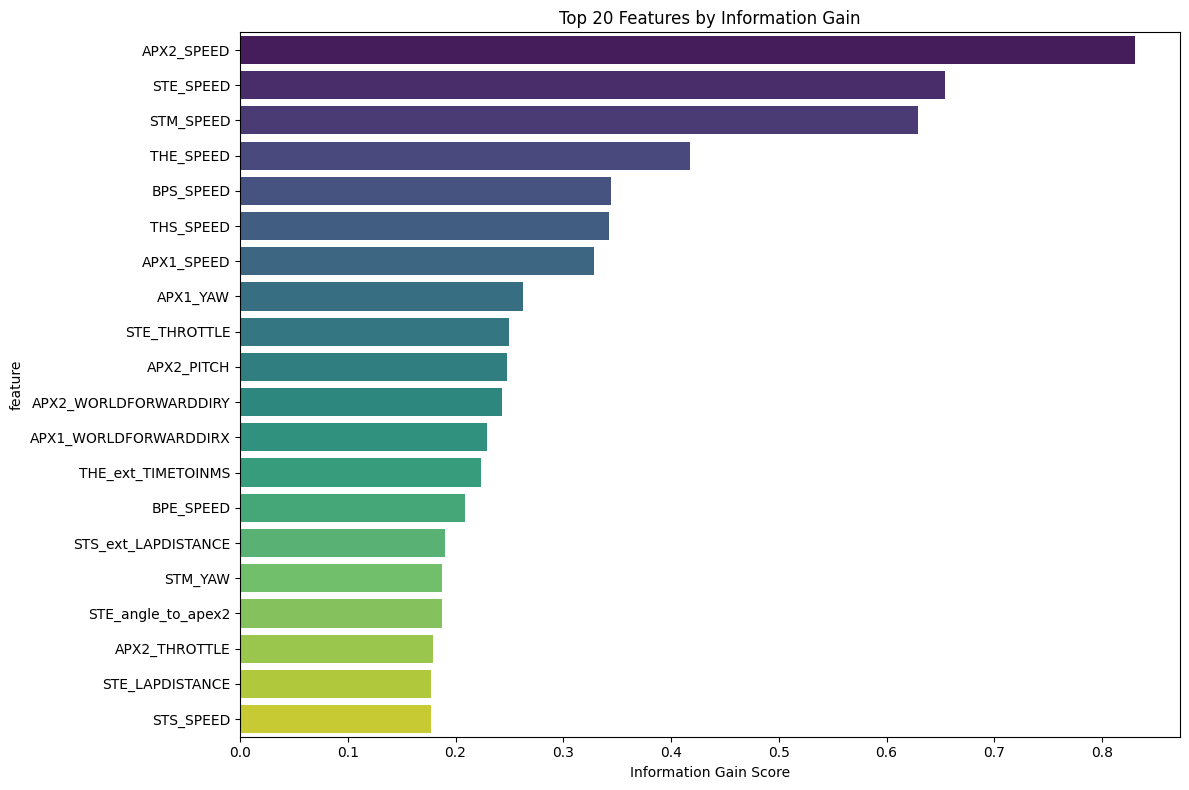

In [15]:
#Feature Selection: Information Gain

print("=== TOP FEATURES BY INFORMATION GAIN ===")
print(f"Total features analyzed: {len(Scores)}")
print("\nTop 30 Most Important Features:")
print(Scores.head(30))

# Visualizations for interpretation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_20 = Scores.head(20)
sns.barplot(data=top_20, y='feature', x='mi_score', palette='viridis')
plt.title('Top 20 Features by Information Gain')
plt.xlabel('Information Gain Score')
plt.tight_layout()
plt.show()

In [16]:
# Select top 15-20 features for your model
k = 15
selected_features = Scores.head(k)['feature'].tolist()

print(f"Selected {len(selected_features)} features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Create your final dataset
X_final = X[selected_features]
print(f"\nFinal dataset shape: {X_final.shape}")

Selected 15 features:
 1. APX2_SPEED
 2. STE_SPEED
 3. STM_SPEED
 4. THE_SPEED
 5. BPS_SPEED
 6. THS_SPEED
 7. APX1_SPEED
 8. APX1_YAW
 9. STE_THROTTLE
10. APX2_PITCH
11. APX2_WORLDFORWARDDIRY
12. APX1_WORLDFORWARDDIRX
13. THE_ext_TIMETOINMS
14. BPE_SPEED
15. STS_ext_LAPDISTANCE

Final dataset shape: (825, 15)


In [17]:
# Select the TOP 15 features
k = 15
selected_features = Scores.head(k)['feature'].tolist()

print("=== YOUR TOP 15 FEATURES ===")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Now analyze THESE 15 features
print("\n=== ANALYSIS OF TOP 15 FEATURES ===")

# Group by moment type
moment_types = ['BPS', 'BPE', 'THS', 'THE', 'STS', 'STM', 'STE', 'APX1', 'APX2']

for moment in moment_types:
    moment_features = [f for f in selected_features if f.startswith(moment)]
    if moment_features:  # Only print if we have features
        print(f"{moment}: {len(moment_features)} features - {moment_features}")

# Check which attributes are most common
print("\n=== ATTRIBUTE BREAKDOWN ===")
attribute_types = {}
for feature in selected_features:
    # Get everything after the first underscore
    attr = feature.split('_', 1)[1] if '_' in feature else feature
    attribute_types[attr] = attribute_types.get(attr, 0) + 1

for attr, count in sorted(attribute_types.items(), key=lambda x: x[1], reverse=True):
    print(f"  {attr}: {count} features")

=== YOUR TOP 15 FEATURES ===
 1. APX2_SPEED
 2. STE_SPEED
 3. STM_SPEED
 4. THE_SPEED
 5. BPS_SPEED
 6. THS_SPEED
 7. APX1_SPEED
 8. APX1_YAW
 9. STE_THROTTLE
10. APX2_PITCH
11. APX2_WORLDFORWARDDIRY
12. APX1_WORLDFORWARDDIRX
13. THE_ext_TIMETOINMS
14. BPE_SPEED
15. STS_ext_LAPDISTANCE

=== ANALYSIS OF TOP 15 FEATURES ===
BPS: 1 features - ['BPS_SPEED']
BPE: 1 features - ['BPE_SPEED']
THS: 1 features - ['THS_SPEED']
THE: 2 features - ['THE_SPEED', 'THE_ext_TIMETOINMS']
STS: 1 features - ['STS_ext_LAPDISTANCE']
STM: 1 features - ['STM_SPEED']
STE: 2 features - ['STE_SPEED', 'STE_THROTTLE']
APX1: 3 features - ['APX1_SPEED', 'APX1_YAW', 'APX1_WORLDFORWARDDIRX']
APX2: 3 features - ['APX2_SPEED', 'APX2_PITCH', 'APX2_WORLDFORWARDDIRY']

=== ATTRIBUTE BREAKDOWN ===
  SPEED: 8 features
  YAW: 1 features
  THROTTLE: 1 features
  PITCH: 1 features
  WORLDFORWARDDIRY: 1 features
  WORLDFORWARDDIRX: 1 features
  ext_TIMETOINMS: 1 features
  ext_LAPDISTANCE: 1 features


In [18]:
# Create the final modeling dataset
X_final = X[selected_features]
final_data = X_final.copy()
final_data['Target_CURRENTLAPTIMEINMS'] = y.values
final_data['lap_id'] = data['lap_id'].values

print(f"Final dataset shape: {final_data.shape}")
final_data.to_csv('f1_15_optimal_features.csv', index=False)
print("✓ Dataset saved for modeling!")

Final dataset shape: (825, 17)
✓ Dataset saved for modeling!


In [19]:
# Decision Tree Modelling

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Build Decision Tree with limited depth for interpretability
dtree = DecisionTreeRegressor(
    max_depth=4,           # Limit depth to keep it interpretable
    min_samples_split=20,  # Need at least 20 samples to split
    min_samples_leaf=10,   # Need at least 10 samples in leaf
    random_state=42
)

# Fit the model
dtree.fit(X_train, y_train)

# Evaluate
train_score = dtree.score(X_train, y_train)
test_score = dtree.score(X_test, y_test)
print(f"Decision Tree R² Score - Train: {train_score:.3f}, Test: {test_score:.3f}")

Decision Tree R² Score - Train: 0.732, Test: 0.243


In [20]:
# Better Decision Tree with constraints
dtree = DecisionTreeRegressor(
    max_depth=3,           # Limit to 3 levels deep
    min_samples_split=50,  # Need at least 50 laps to split
    min_samples_leaf=25,   # Need at least 25 laps in each leaf
    random_state=42
)

dtree.fit(X_train, y_train)
train_score = dtree.score(X_train, y_train)
test_score = dtree.score(X_test, y_test)
print(f"Improved - Train: {train_score:.3f}, Test: {test_score:.3f}")

Improved - Train: 0.657, Test: 0.324


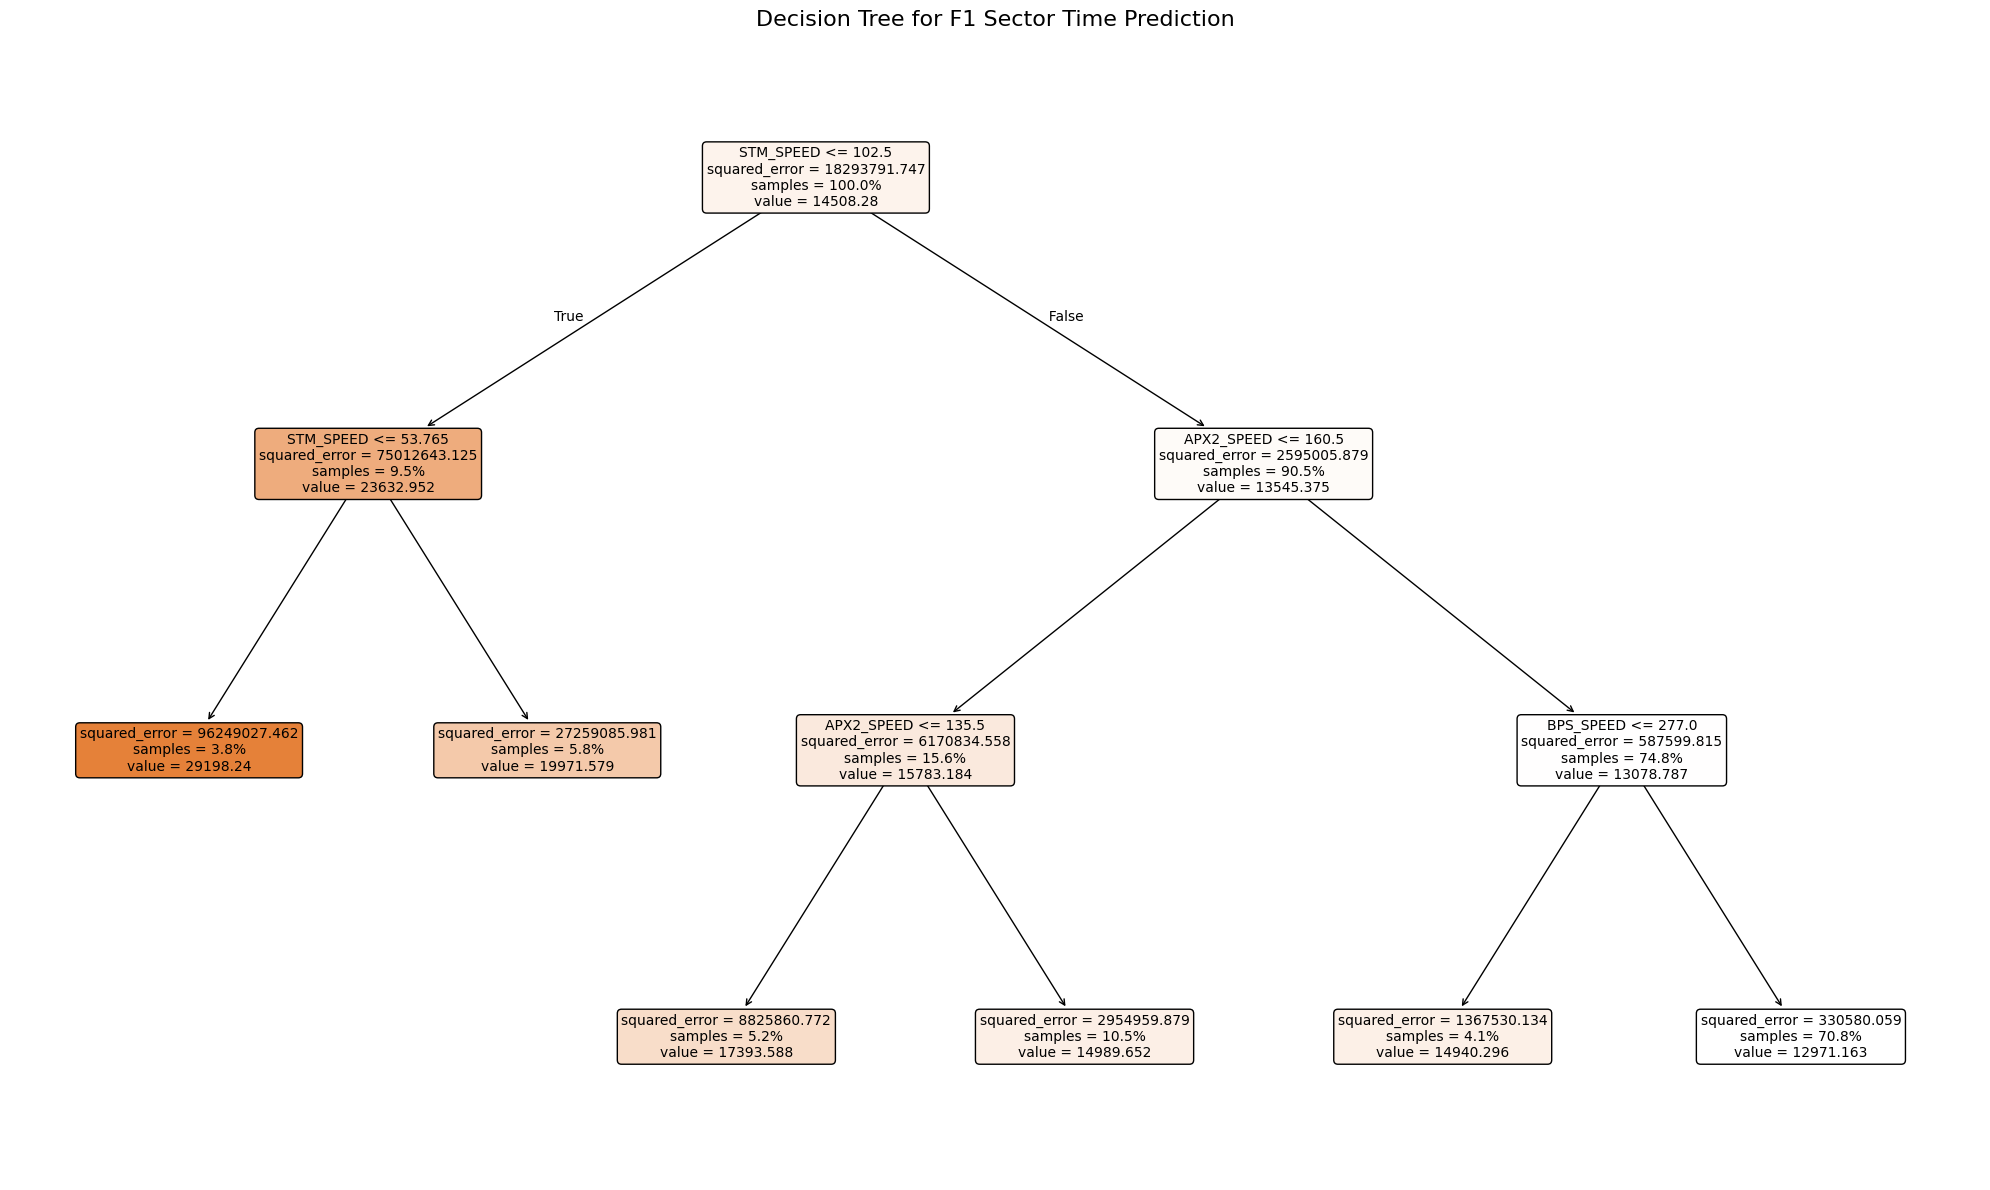

In [21]:
# Create a large figure for the tree
plt.figure(figsize=(20, 12))
plot_tree(dtree,
          feature_names=selected_features,
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True)
plt.title("Decision Tree for F1 Sector Time Prediction", fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
# Extract the decision rules from the tree
from sklearn.tree import _tree

def get_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []

    def recurse(node, depth, rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            # Left child rule
            left_rule = rule + f"IF {name} <= {threshold:.2f} THEN "
            recurse(tree_.children_left[node], depth + 1, left_rule)

            # Right child rule
            right_rule = rule + f"IF {name} > {threshold:.2f} THEN "
            recurse(tree_.children_right[node], depth + 1, right_rule)
        else:
            # Leaf node - add the prediction
            prediction = tree_.value[node][0][0]
            rules.append(rule + f"PREDICT: {prediction:.0f} ms")

    recurse(0, 1, "")
    return rules

# Get and print the top rules
rules = get_rules(dtree, selected_features)
print("=== KEY DECISION RULES ===")
for i, rule in enumerate(rules[:10], 1):  # Show first 10 rules
    print(f"{i}. {rule}")

=== KEY DECISION RULES ===
1. IF STM_SPEED <= 102.50 THEN IF STM_SPEED <= 53.77 THEN PREDICT: 29198 ms
2. IF STM_SPEED <= 102.50 THEN IF STM_SPEED > 53.77 THEN PREDICT: 19972 ms
3. IF STM_SPEED > 102.50 THEN IF APX2_SPEED <= 160.50 THEN IF APX2_SPEED <= 135.50 THEN PREDICT: 17394 ms
4. IF STM_SPEED > 102.50 THEN IF APX2_SPEED <= 160.50 THEN IF APX2_SPEED > 135.50 THEN PREDICT: 14990 ms
5. IF STM_SPEED > 102.50 THEN IF APX2_SPEED > 160.50 THEN IF BPS_SPEED <= 277.00 THEN PREDICT: 14940 ms
6. IF STM_SPEED > 102.50 THEN IF APX2_SPEED > 160.50 THEN IF BPS_SPEED > 277.00 THEN PREDICT: 12971 ms


=== FEATURE IMPORTANCE FROM DECISION TREE ===
                  feature  importance
2               STM_SPEED    0.892404
0              APX2_SPEED    0.095126
4               BPS_SPEED    0.012470
1               STE_SPEED    0.000000
3               THE_SPEED    0.000000
5               THS_SPEED    0.000000
6              APX1_SPEED    0.000000
7                APX1_YAW    0.000000
8            STE_THROTTLE    0.000000
9              APX2_PITCH    0.000000
10  APX2_WORLDFORWARDDIRY    0.000000
11  APX1_WORLDFORWARDDIRX    0.000000
12     THE_ext_TIMETOINMS    0.000000
13              BPE_SPEED    0.000000
14    STS_ext_LAPDISTANCE    0.000000


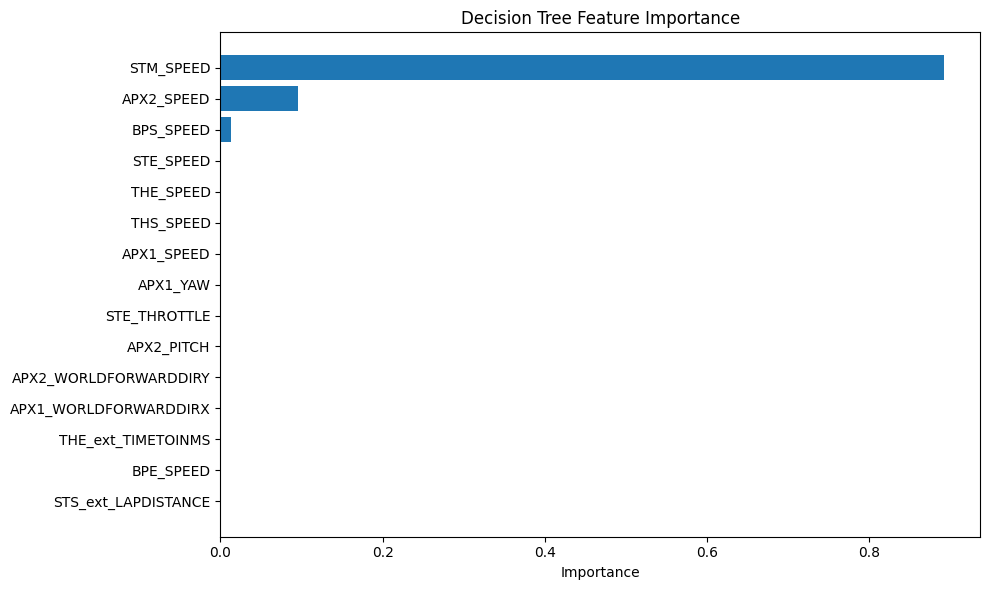

In [23]:
# Get feature importance
importance = pd.DataFrame({
    'feature': selected_features,
    'importance': dtree.feature_importances_
}).sort_values('importance', ascending=False)

print("=== FEATURE IMPORTANCE FROM DECISION TREE ===")
print(importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'])
plt.xlabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
# Analyze what makes a lap fast vs slow
print("=== FAST LAP PROFILE ===")

# Find the leaf node with the fastest predicted time
fastest_leaf = np.argmin(dtree.tree_.value[:, 0, 0])
print(f"Fastest leaf predicts: {dtree.tree_.value[fastest_leaf][0][0]:.0f} ms")

print("\n=== SLOW LAP PROFILE ===")
# Find the leaf node with the slowest predicted time
slowest_leaf = np.argmax(dtree.tree_.value[:, 0, 0])
print(f"Slowest leaf predicts: {dtree.tree_.value[slowest_leaf][0][0]:.0f} ms")

=== FAST LAP PROFILE ===
Fastest leaf predicts: 12971 ms

=== SLOW LAP PROFILE ===
Slowest leaf predicts: 29198 ms
